In [1]:
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
from tqdm import tqdm
import time

import sys
print(sys.executable)

c:\Users\Justin\AppData\Local\Programs\Python\Python312\python.exe


In [2]:
# Read Cleaned Standarized Data (See main.ipynb)

df = pd.read_csv("Data/Clean_Standard_Data.csv")
df

,Support Calls,Total Spend,Contract Length_Monthly,Payment Delay,Age,Gender_Male,Gender_Female,Churn
0,0.053192,0.441055,-0.525226,-0.413769,0.260117,0.895850,-0.895850,0
1,0.053192,0.041446,-0.525226,0.887823,-0.608036,0.895850,-0.895850,1
2,-0.265930,-0.333698,-0.525226,0.177863,0.023348,0.895850,-0.895850,0
3,0.372313,0.534841,-0.525226,-1.360382,0.575809,0.895850,-0.895850,1
4,-0.265930,0.620472,-0.525226,-0.058790,0.260117,0.895850,-0.895850,0
...,...,...,...,...,...,...,...,...
449423,-0.265930,0.008824,-0.525226,-0.177116,0.733655,-1.116256,1.116256,0
449424,-0.265930,1.399303,-0.525226,0.651170,0.102271,-1.116256,1.116256,0
449425,-0.265930,-1.503983,-0.525226,0.532843,1.522885,-1.116256,1.116256,1
449426,-0.585051,1.109790,1.903938,1.479456,-0.923728,-1.116256,1.116256,1


In [3]:
# Shuffle and sample the dataset (downsample to 5000 examples)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df = df[:100000]
features = df[df.columns[:-1]]
target = df["Churn"]

X_temp, X_test, y_temp, y_test = train_test_split(features, target, test_size=0.1, random_state=420)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=420)

In [4]:


# Shape of all train, test, and validation 
print("- - -" * 7)
print(f"Shape of Features {features.shape}")
print(f"Shape of Target {target.shape}")
print("- - -" * 7 + "\n")
print(f"Shape of X_train {X_train.shape}")
print(f"Shape of X_val {X_val.shape}")
print(f"Shape of X_test {X_test.shape}")
print("- - -" * 7 + "\n")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of y_val {y_val.shape}")
print(f"Shape of y_test {y_test.shape}")
print("- - -" * 7 + "\n")
print(f"Train is {round(X_train.shape[0] / features.shape[0], 2) * 100}% of total")
print(f"Test is {round(X_test.shape[0] / features.shape[0], 2) * 100}% of total")
print(f"Val is {round(X_val.shape[0] / features.shape[0],2) * 100}% of total")
print("- - -" * 7 + "\n")

# Class distribution in original and splits
pct_1_df = df["Churn"].mean()
pct_0_df = 1 - pct_1_df
print(f"% of 0's in df: {pct_0_df}")
print(f"% of 1's in df: {pct_1_df}")

pct_1_train = y_train.mean()
pct_0_train = 1 - pct_1_train
print(f"% of 0's in y_train: {pct_0_train}")
print(f"% of 1's in y_train: {pct_1_train}")

pct_1_val = y_val.mean()
pct_0_val = 1 - pct_1_val
print(f"% of 0's in y_val: {pct_0_val}")
print(f"% of 1's in y_val: {pct_1_val}")

pct_1_test = y_test.mean()
pct_0_test = 1 - pct_1_test
print(f"% of 0's in y_test: {pct_0_test}")
print(f"% of 1's in y_test: {pct_1_test}")

- - -- - -- - -- - -- - -- - -- - -
Shape of Features (100000, 7)
Shape of Target (100000,)
- - -- - -- - -- - -- - -- - -- - -

Shape of X_train (81000, 7)
Shape of X_val (9000, 7)
Shape of X_test (10000, 7)
- - -- - -- - -- - -- - -- - -- - -

Shape of y_train (81000,)
Shape of y_val (9000,)
Shape of y_test (10000,)
- - -- - -- - -- - -- - -- - -- - -

Train is 81.0% of total
Test is 10.0% of total
Val is 9.0% of total
- - -- - -- - -- - -- - -- - -- - -

% of 0's in df: 0.5
% of 1's in df: 0.5
% of 0's in y_train: 0.5001851851851852
% of 1's in y_train: 0.4998148148148148
% of 0's in y_val: 0.5067777777777778
% of 1's in y_val: 0.49322222222222223
% of 0's in y_test: 0.49239999999999995
% of 1's in y_test: 0.5076


In [5]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

K_vals = [i for i in range(1, 50 + 1)]
val_acc = []
train_acc = []
models = []

# Fit model for each depth
# tqdm is a loading bar
for k in tqdm(range(len(K_vals)), desc="Loading… D",  ascii=False, ncols=75):

    # Fit using each value of Max_depth 1 to 50
    model = KNeighborsClassifier(n_neighbors=K_vals[k])
    model.fit(X_train, y_train)  
    

    # Get train and validation accuracy for each max depth value
    train_preds = model.predict(X_train)
    train = accuracy_score(y_train,train_preds)

    val_preds = model.predict(X_val)
    val = accuracy_score(y_val,val_preds)

    

    val_acc.append(val)
    train_acc.append(train)

    models.append(model)


val_acc

Loading… D: 100%|██████████████████████████| 50/50 [03:33<00:00,  4.27s/it]


[0.8594444444444445,
 0.8252222222222222,
 0.8931111111111111,
 0.874,
 0.8986666666666666,
 0.8891111111111111,
 0.9045555555555556,
 0.8984444444444445,
 0.9056666666666666,
 0.9027777777777778,
 0.9062222222222223,
 0.9041111111111111,
 0.9065555555555556,
 0.9048888888888889,
 0.906,
 0.9043333333333333,
 0.9054444444444445,
 0.9048888888888889,
 0.9052222222222223,
 0.9045555555555556,
 0.9054444444444445,
 0.9041111111111111,
 0.9046666666666666,
 0.9035555555555556,
 0.9038888888888889,
 0.9032222222222223,
 0.9034444444444445,
 0.9036666666666666,
 0.9044444444444445,
 0.9035555555555556,
 0.9033333333333333,
 0.9034444444444445,
 0.9036666666666666,
 0.903,
 0.9033333333333333,
 0.9027777777777778,
 0.9026666666666666,
 0.9024444444444445,
 0.9025555555555556,
 0.9022222222222223,
 0.9024444444444445,
 0.9018888888888889,
 0.9021111111111111,
 0.9018888888888889,
 0.9021111111111111,
 0.9022222222222223,
 0.9023333333333333,
 0.9018888888888889,
 0.9022222222222223,
 0.9016666

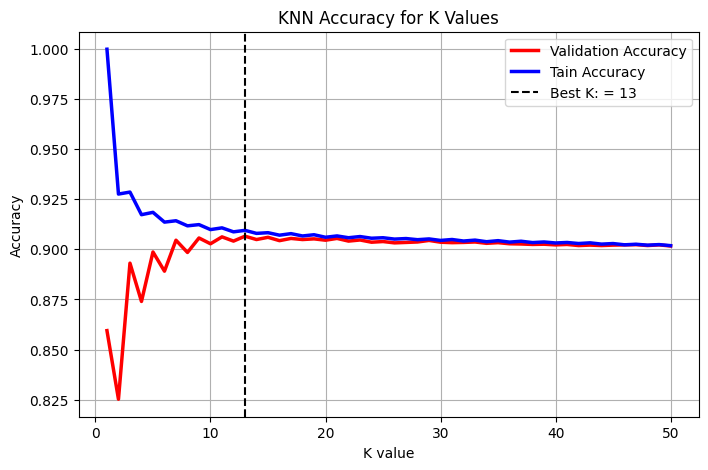

Best K value = 13, Accuracy = 0.9066


In [6]:
# Max Accuracy Depth and The Accuracy
max_k_acc= K_vals[np.argmax(val_acc)]
best_score = np.max(val_acc)

# Plot accuracy vs. K
plt.figure(figsize=(8, 5))
np_arr = np.array(K_vals)
plt.plot(K_vals, val_acc, color="Red", label="Validation Accuracy", linewidth=2.5)
plt.plot(K_vals, train_acc, color="Blue", label="Tain Accuracy", linewidth=2.5)

plt.axvline(x=max_k_acc, color="black", linestyle="--", label=f"Best K: = {max_k_acc}")

plt.title("KNN Accuracy for K Values")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
# Print best K and score
print(f"Best K value = {max_k_acc}, Accuracy = {best_score:.4f}")

In [7]:
from sklearn.metrics import classification_report

# Retrain the best model on the full training set
best_tree = KNeighborsClassifier(n_neighbors=max_k_acc)
best_tree.fit(X_train, y_train)

test_acc = best_tree.score(X_test, y_test)
y_pred = best_tree.predict(X_test)

print(classification_report(y_test, y_pred))
print(f"\n\n Test Accuracy: {test_acc * 100}")

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      4924
           1       0.88      0.94      0.91      5076

    accuracy                           0.91     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.91      0.91     10000



 Test Accuracy: 90.52
